# 1.	Activité n°1 : Lecture d’une vidéo

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [ ]:

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error opening webcam")
else:
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Convert BGR (OpenCV) to RGB (matplotlib)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Clear output to refresh the image
            clear_output(wait=True)
            plt.imshow(frame_rgb)
            plt.axis('off')
            plt.title("Live Webcam Feed")
            plt.show()

            time.sleep(0.05)  # Adjust frame rate (20 fps)

    except KeyboardInterrupt:
        print("Capture stopped")

cap.release()

Capture stopped


# 2.	Activité 2: Création d’un modèle à base d’une séquence de couches

chargement vidéo

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Charger la vidéo
cap = cv2.VideoCapture("video_cars.mp4")  # ou 0 pour webcam
frames = []

while True:
    ret, frame = cap.read()
    if not ret or len(frames) >= 10:  # Limiter à 10 frames
        break
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

cap.release()

print(f"{len(frames)} frames chargées.")

10 frames chargées.


Différence d’images

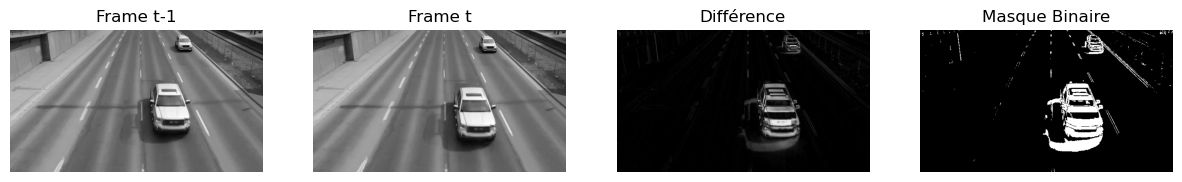

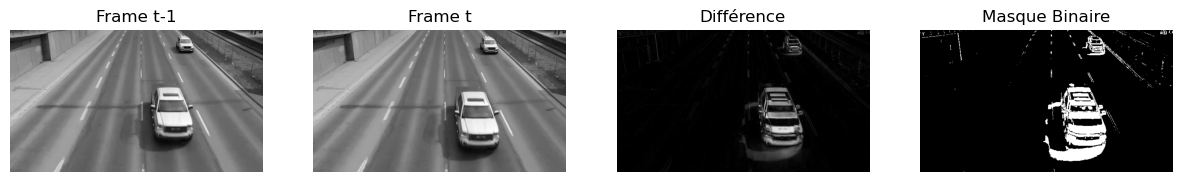

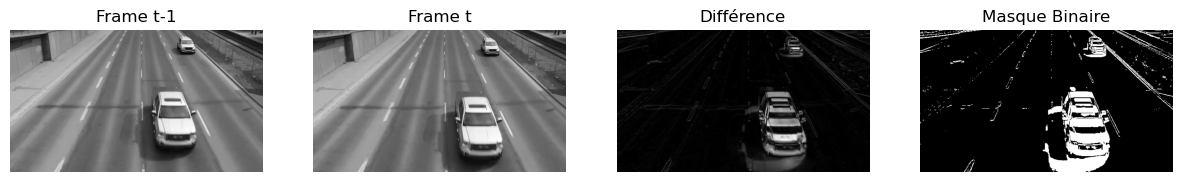

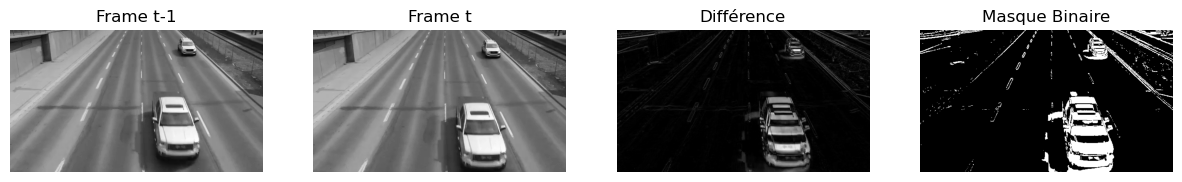

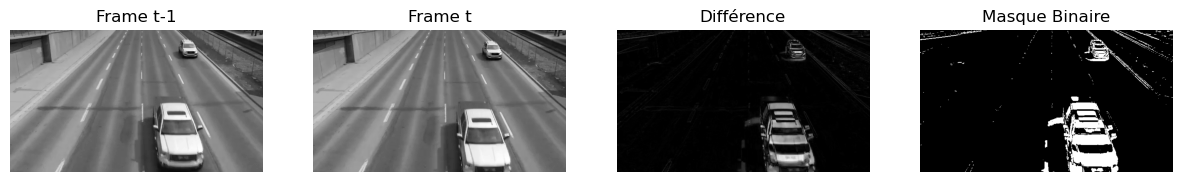

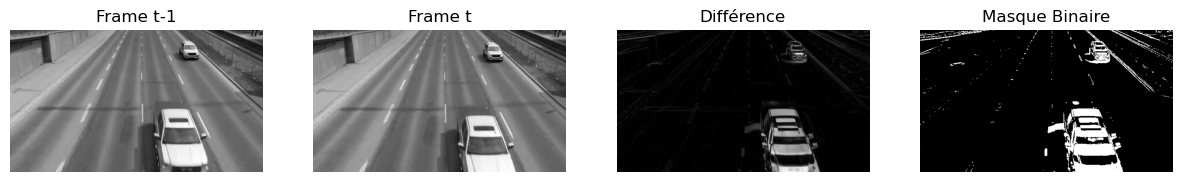

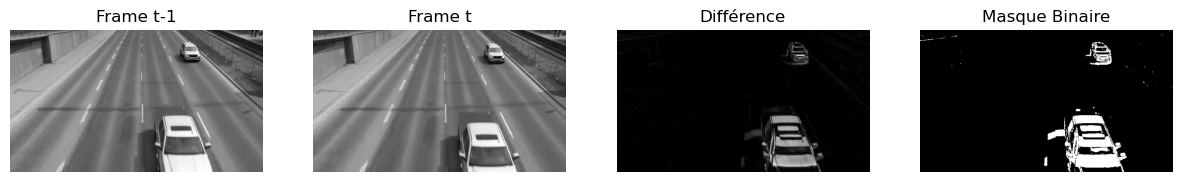

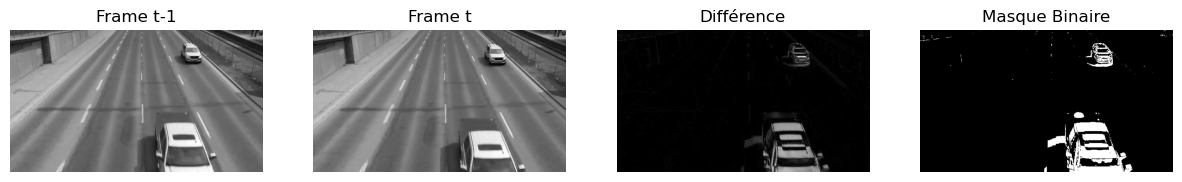

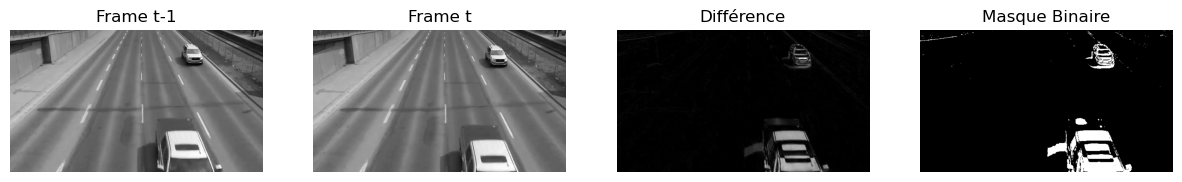

In [7]:
th = 25  # seuil

for i in range(1, len(frames)):
    diff = cv2.absdiff(frames[i], frames[i-1])
    _, mask = cv2.threshold(diff, th, 255, cv2.THRESH_BINARY)

    show_images(
        [frames[i-1], frames[i], diff, mask],
        ["Frame t-1", "Frame t", "Différence", "Masque Binaire"]
    )


Dérivation temporelle

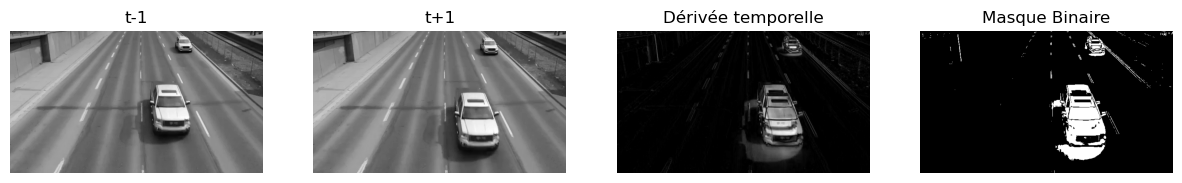

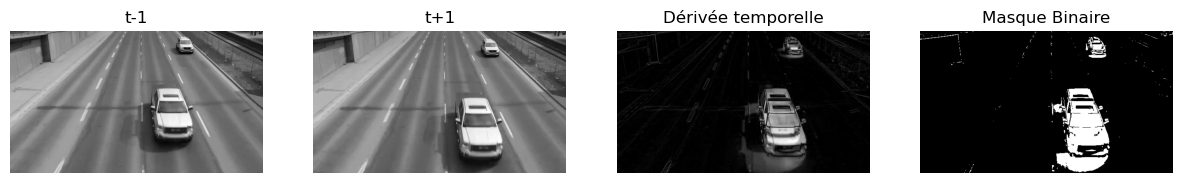

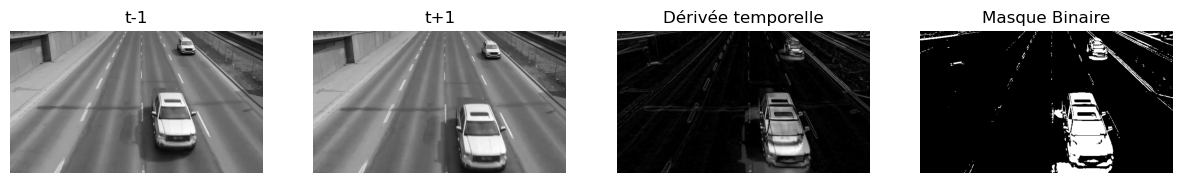

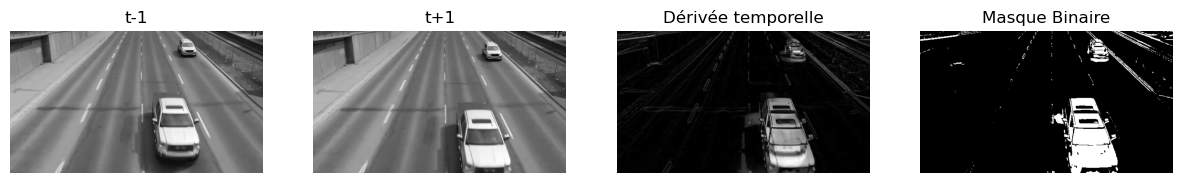

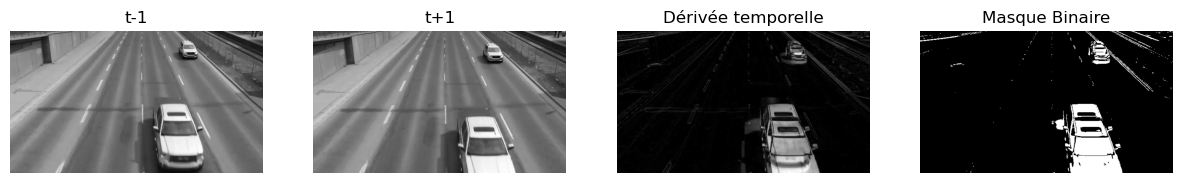

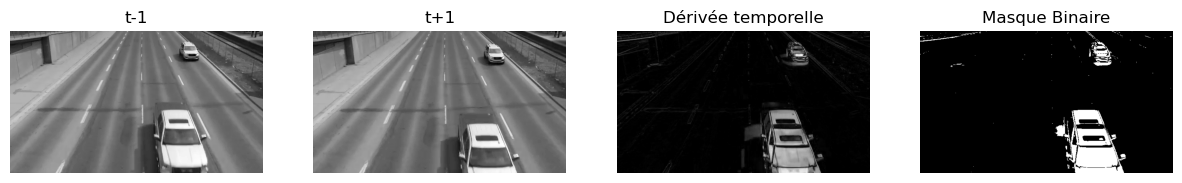

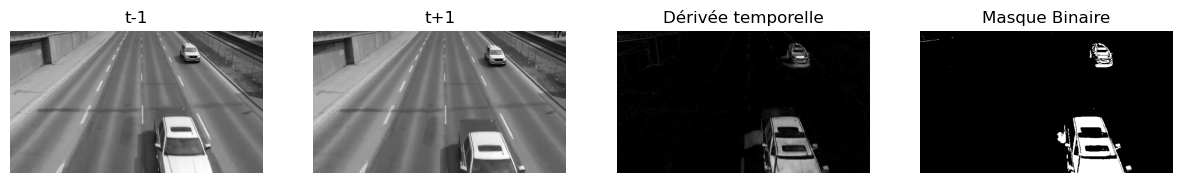

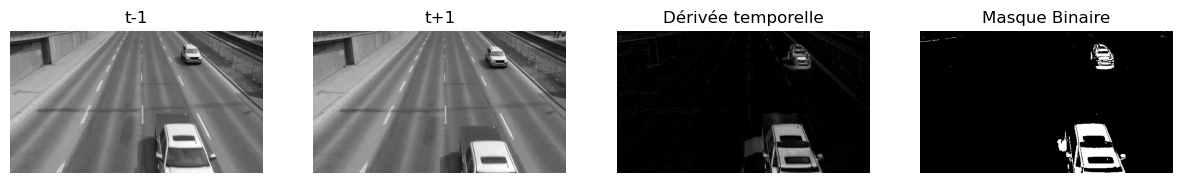

In [8]:
th = 25

for i in range(1, len(frames) - 1):
    deriv = cv2.absdiff(frames[i+1], frames[i-1]) // 2
    _, mask = cv2.threshold(deriv, th, 255, cv2.THRESH_BINARY)

    show_images(
        [frames[i-1], frames[i+1], deriv, mask],
        ["t-1", "t+1", "Dérivée temporelle", "Masque Binaire"]
    )


Filtre médian sur le masque de différence

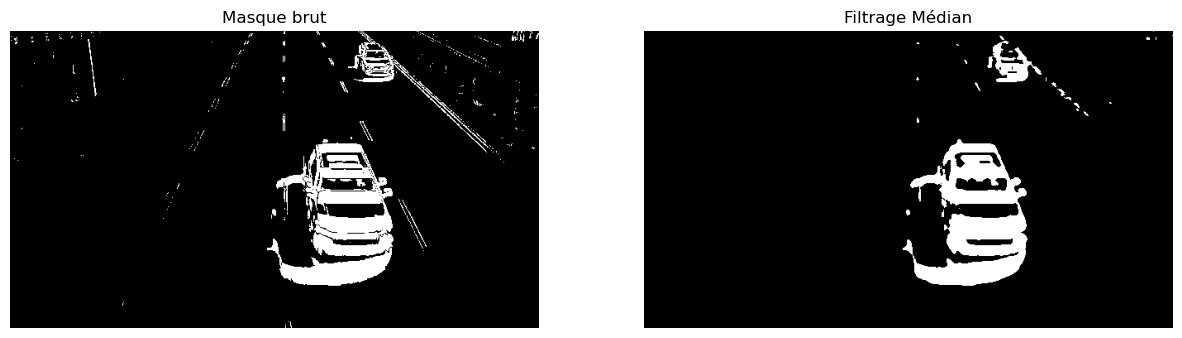

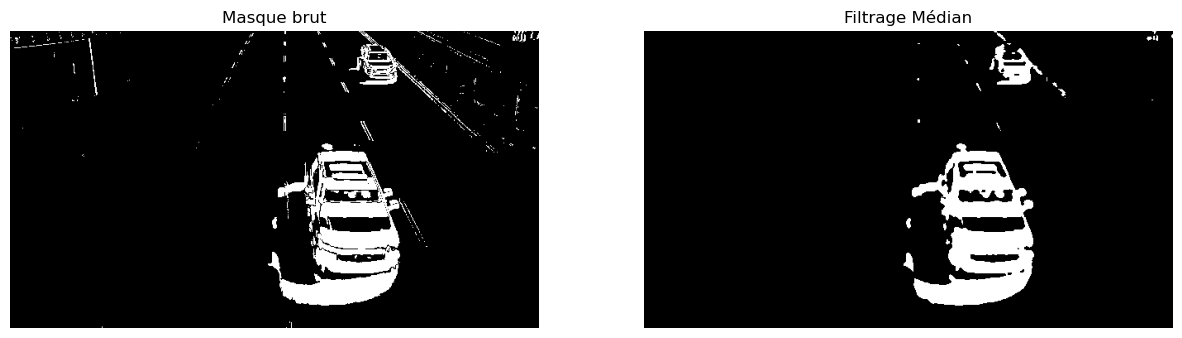

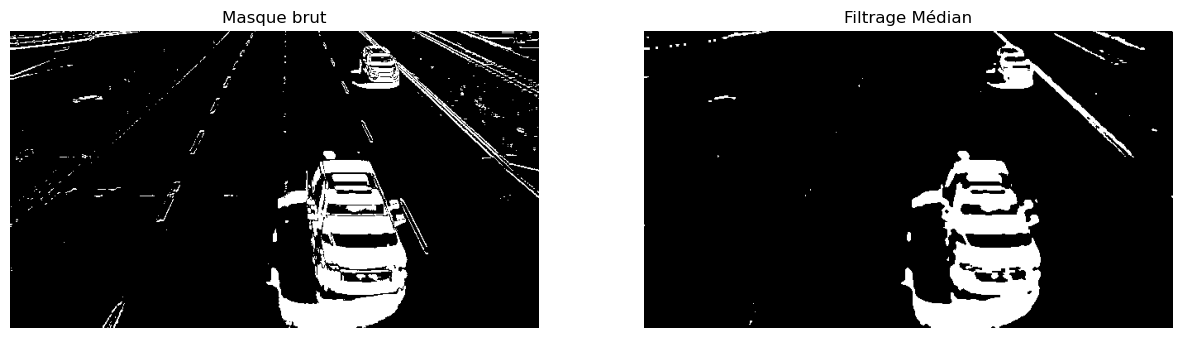

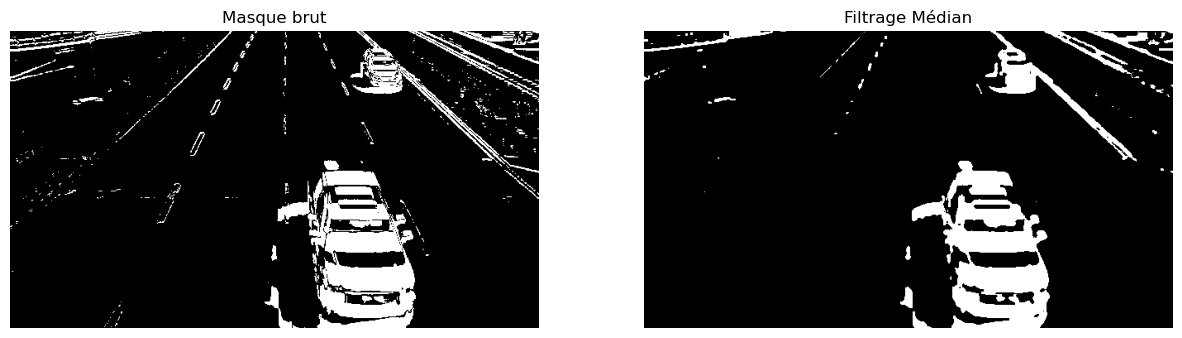

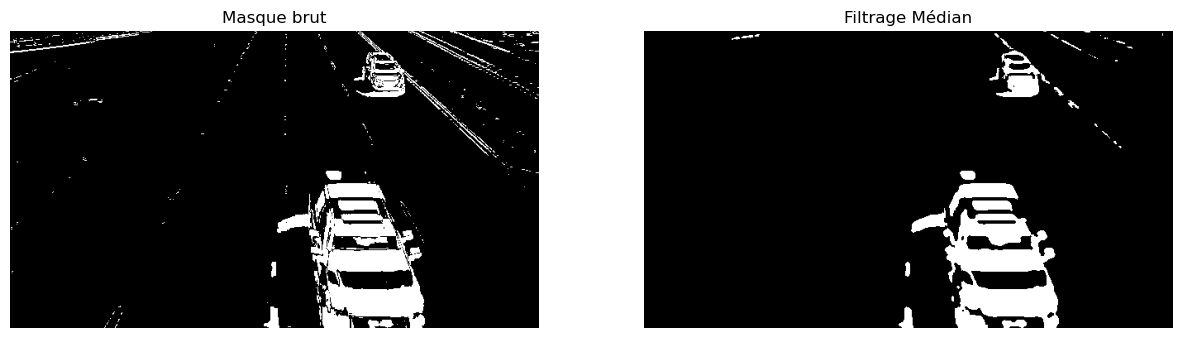

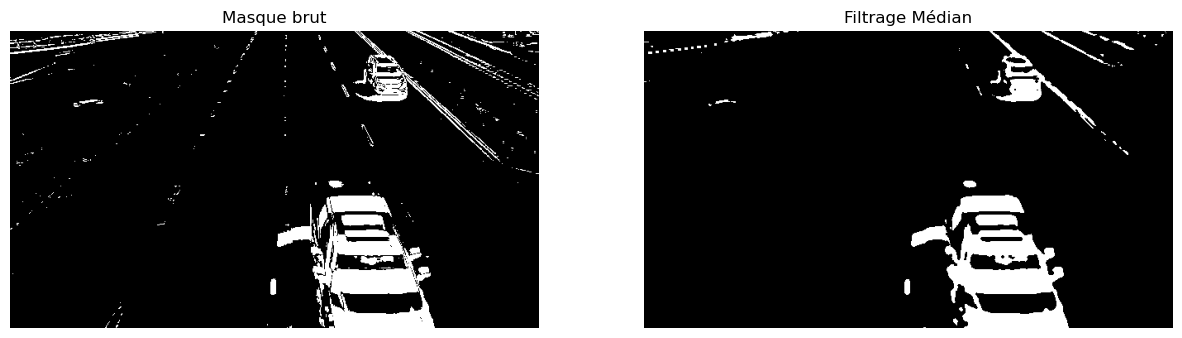

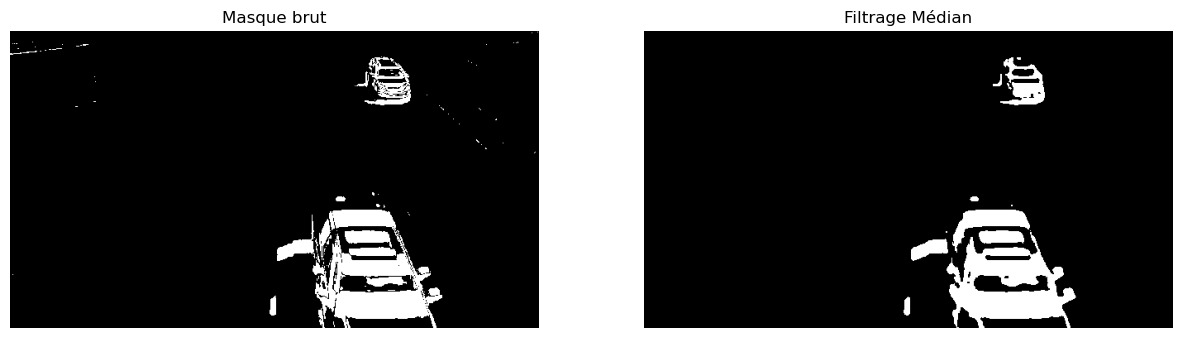

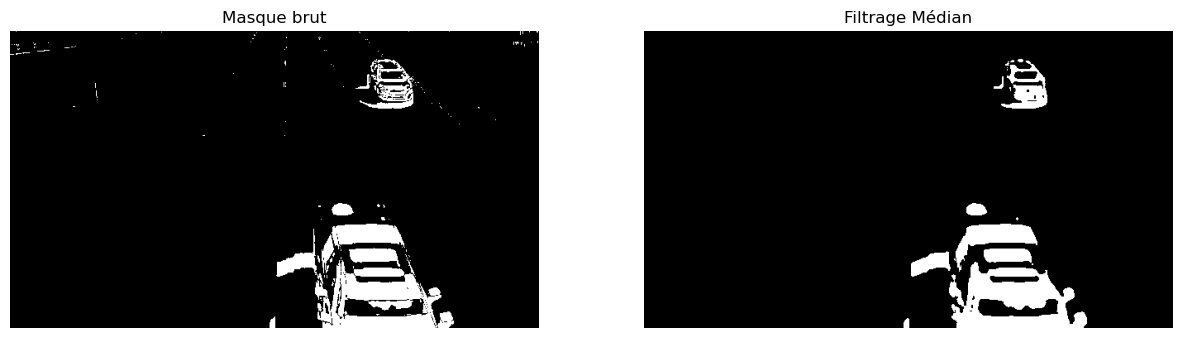

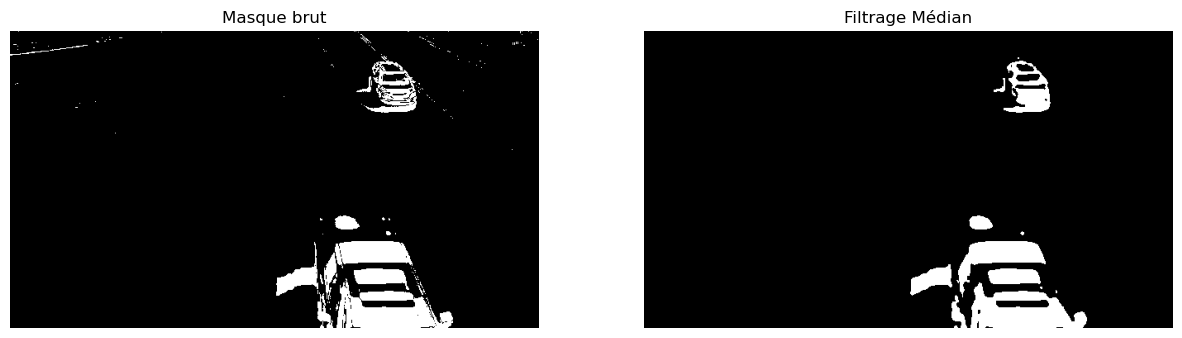

In [9]:
th = 25

for i in range(1, len(frames)):
    diff = cv2.absdiff(frames[i], frames[i-1])
    _, mask = cv2.threshold(diff, th, 255, cv2.THRESH_BINARY)
    median_filtered = cv2.medianBlur(mask, 5)

    show_images(
        [mask, median_filtered],
        ["Masque brut", "Filtrage Médian"]
    )


 # Filtre moyen (blur) sur le masque

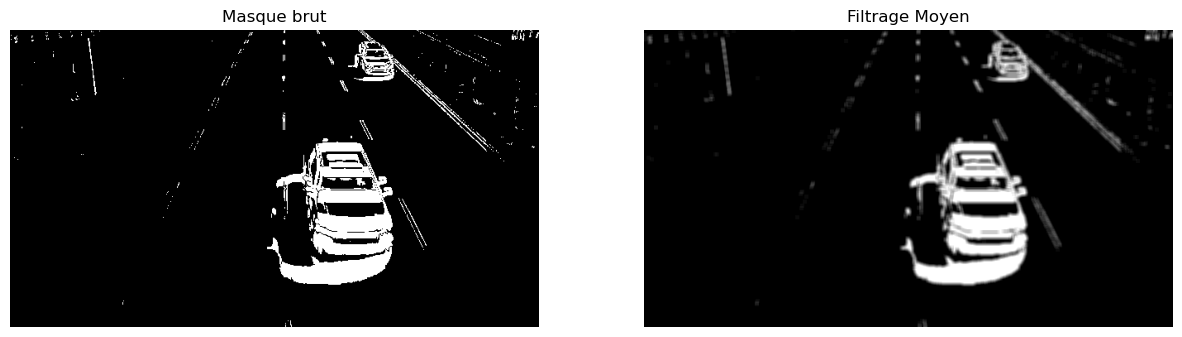

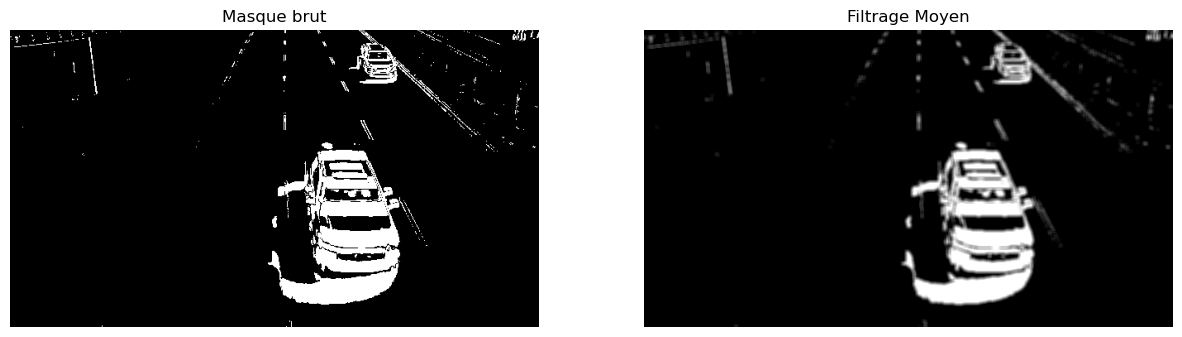

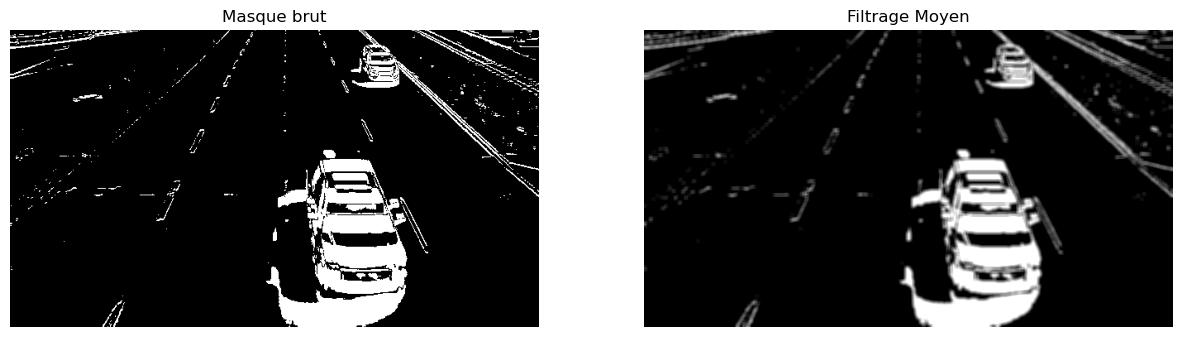

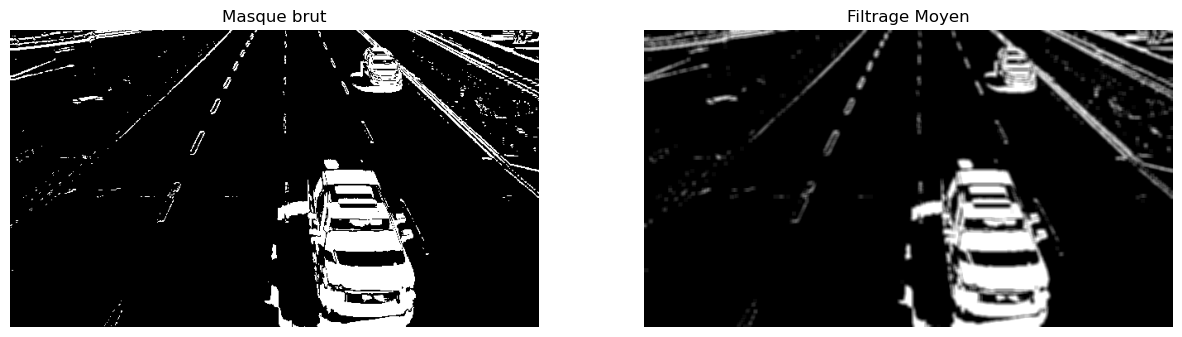

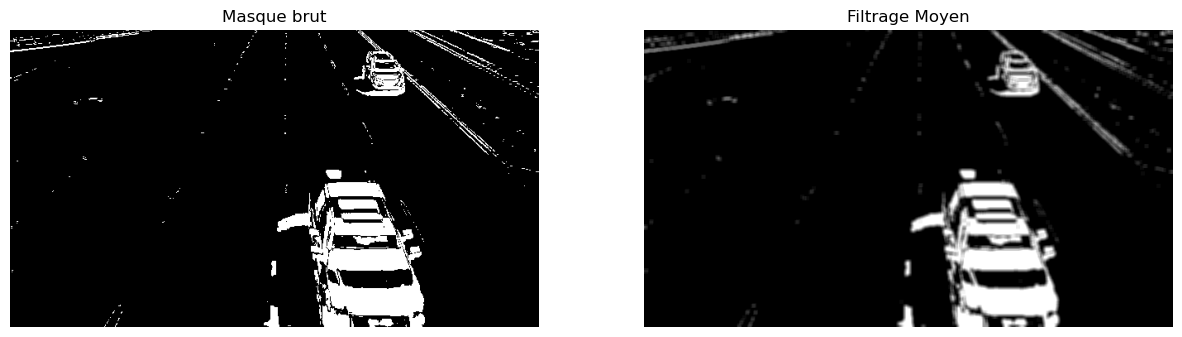

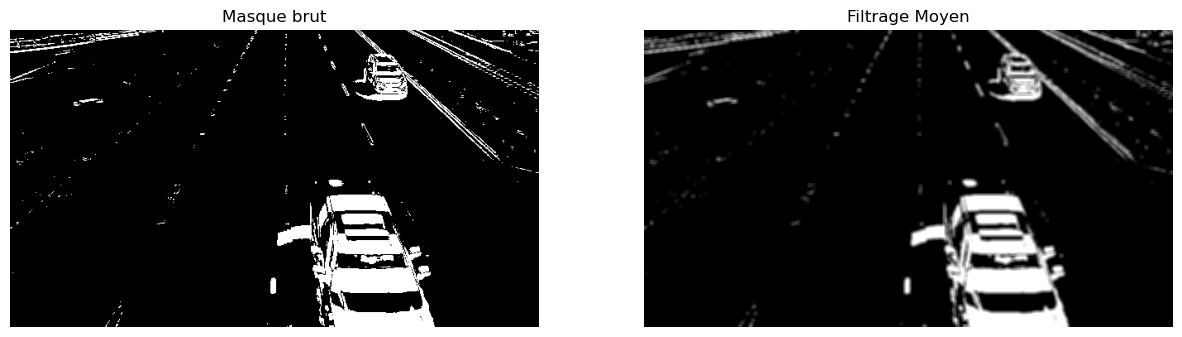

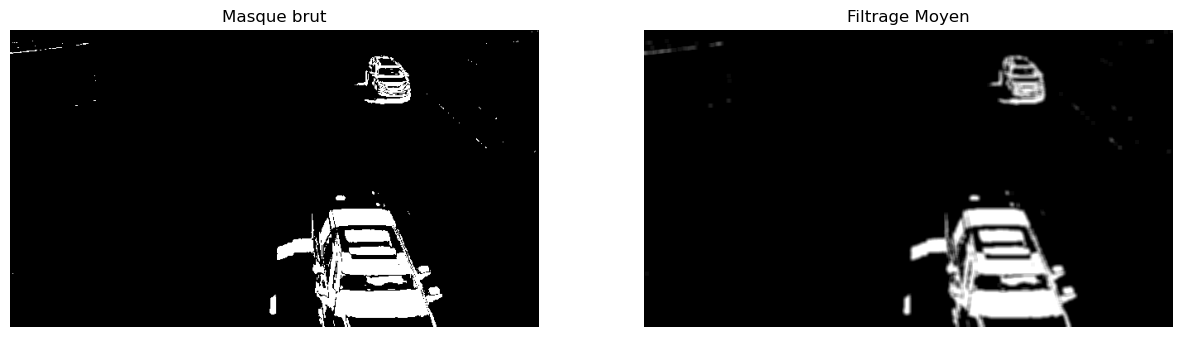

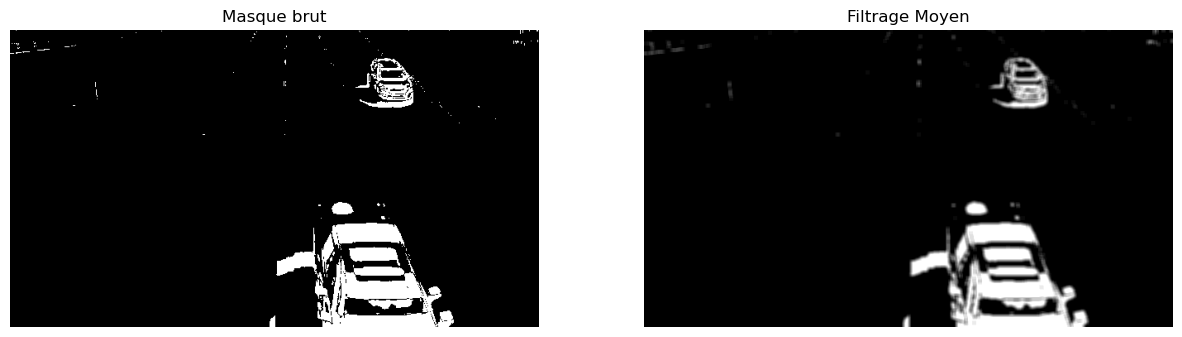

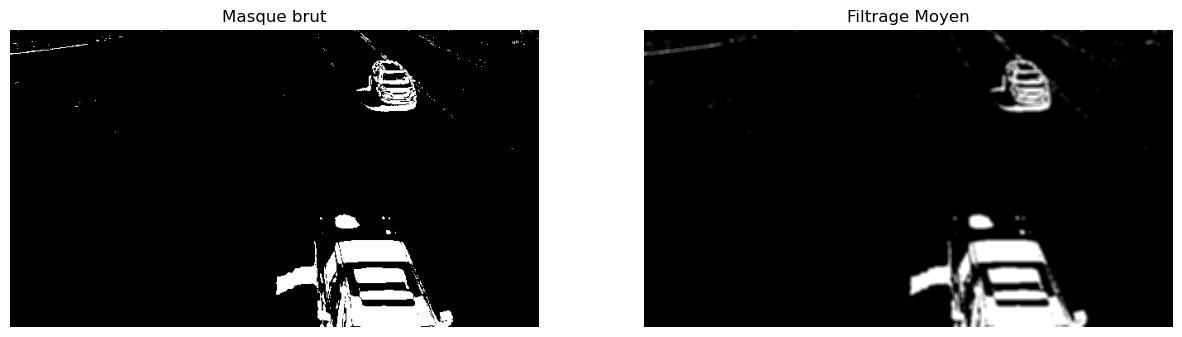

In [10]:
th = 25

for i in range(1, len(frames)):
    diff = cv2.absdiff(frames[i], frames[i-1])
    _, mask = cv2.threshold(diff, th, 255, cv2.THRESH_BINARY)
    mean_filtered = cv2.blur(mask, (5, 5))

    show_images(
        [mask, mean_filtered],
        ["Masque brut", "Filtrage Moyen"]
    )
